In [39]:
import os
from glob import glob
import matplotlib.pyplot as plt
import compress_json
import numpy as np

In [40]:
reports = glob("graph_miner/repositories/*/*/*.json.gz")

In [43]:
nodes = []
edges = []
for report_path in reports:
    report = compress_json.load(report_path)
    nodes.append(int(report["graph_json_report"]["nodes_number"]))
    edges.append(int(report["graph_json_report"]["edges_number"]))
    textual = report["graph_textual_report"]
    no_self_loops = "none are self-loops" in textual
    no_singletons = "singleton" not in textual
    single_node_component = "the component with the least nodes has a single node" in textual
    has_problem = no_self_loops and no_singletons and single_node_component
    if has_problem:
        os.remove(report_path)

In [42]:
reports

['graph_miner/repositories/networkrepository/reports/C5009.json.gz',
 'graph_miner/repositories/networkrepository/reports/Gen400P0965.json.gz',
 'graph_miner/repositories/networkrepository/reports/Gen400P0975.json.gz',
 'graph_miner/repositories/networkrepository/reports/San400073.json.gz',
 'graph_miner/repositories/networkrepository/reports/Dsjc5005.json.gz',
 'graph_miner/repositories/networkrepository/reports/MannA9.json.gz',
 'graph_miner/repositories/networkrepository/reports/Hamming104.json.gz',
 'graph_miner/repositories/networkrepository/reports/BioScHt.json.gz',
 'graph_miner/repositories/networkrepository/reports/InfEuroroad.json.gz',
 'graph_miner/repositories/networkrepository/reports/MannA81.json.gz',
 'graph_miner/repositories/networkrepository/reports/YahooMsg.json.gz',
 'graph_miner/repositories/networkrepository/reports/EcoStmarks.json.gz',
 'graph_miner/repositories/networkrepository/reports/Johnson3224.json.gz',
 'graph_miner/repositories/networkrepository/reports/S

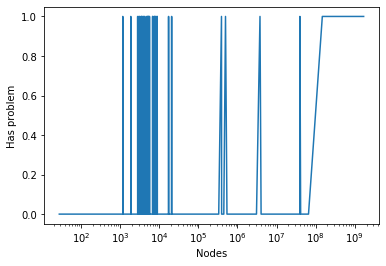

In [23]:
sorted_indices = np.argsort(nodes)

plt.plot(nodes[sorted_indices], has_problem[sorted_indices])
plt.xscale('log',)
plt.xlabel("Nodes")
plt.ylabel("Has problem")
plt.show()

In [26]:
min_value = 1345670000000
minima_index = 0
for i, (node_number, problem) in enumerate(zip(nodes, has_problem)):
    if min_value > node_number and problem:
        min_value = node_number
        minima_index = i
node_number, minima_index

(3094, 8)

In [29]:
np.mean(has_problem)

0.0059891446752760626

In [28]:
compress_json.load(reports[8])

{'graph_name': 'inf-euroroad',
 'graph_method_name': 'InfEuroroad',
 'graph_textual_report': 'The undirected graph inf-euroroad has 1174 nodes and 1417 unweighted edges, of which none are self-loops. The graph is sparse as it has a density of 0.00206 and has 26 connected components, where the component with most nodes has 1039 nodes and the component with the least nodes has a single node. The graph median node degree is 2, the mean node degree is 2.41 and the node degree mode is 2. The top 5 most central nodes are 284 (degree 10), 236 (degree 8), 107 (degree 8), 137 (degree 8) and 39 (degree 8).',
 'graph_json_report': {'directed': 'false',
  'has_node_types': 'false',
  'unique_edge_types_number': '0',
  'name': 'inf-euroroad',
  'edges_number': '2834',
  'singletons': '0',
  'degree_mean': '2.41396933560477',
  'has_edge_types': 'false',
  'density': '0.002057944872638338',
  'unique_node_types_number': '0',
  'self_loops_number': '0',
  'has_weights': 'false',
  'undirected_edges_n

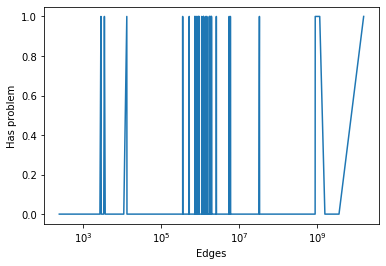

In [21]:
sorted_indices = np.argsort(edges)

plt.plot(edges[sorted_indices], has_problem[sorted_indices])
plt.xscale('log',) 
plt.xlabel("Edges")
plt.ylabel("Has problem")
plt.show()